<a href="https://colab.research.google.com/github/WardahAsad/SignEase/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment: K-Means Clustering for Customer Segmentation**

## **Objective**  
Perform **K-Means clustering** to segment customers into different groups based on their annual income and spending score. The goal is to identify patterns in customer data and group them accordingly.

---

## **Dataset**  
Download the **Mall Customers dataset** from Kaggle:  
🔗 [Mall Customers Dataset](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)  

- Load the **Mall_Customers.csv** dataset into a Pandas DataFrame and display the first few rows to understand the structure.
- The **"Annual Income (k$)"** and **"Spending Score (1-100)"** columns will be used as features for clustering.
- The **"Gender"** column can be ignored for clustering, as we are not using it for the current task.

---

## **Feature Description**  
- **Target Feature:** None (Unsupervised learning task)  
- **Features for Clustering:**  
  - **Annual Income (k$)** (Annual income in thousands of dollars)
  - **Spending Score (1-100)** (A score given based on the customer's spending behavior)

---

## **Tasks**  

### **1. Data Preprocessing**  
- Load the **Mall Customers dataset** and check for missing values.  
- Standardize the features **Annual Income** and **Spending Score** using **StandardScaler** (this is important for K-Means).

---

### **2. Perform K-Means Clustering**  
- Apply **K-Means clustering** with different values of `k` (the number of clusters). Start by setting `k = 5`.
- Visualize the clusters on a 2D plot using **Matplotlib** or **Seaborn**.  
- Use the **Elbow Method** to determine the optimal number of clusters by plotting the **Within-cluster Sum of Squares (WCSS)** for different values of `k`.

---

### **3. Hyperparameter Tuning**  
- Perform the **Elbow Method** to find the optimal value of `k` (number of clusters).  
- Try different values of `k` (e.g., 3, 4, 6, etc.) and evaluate the cluster formation.

---

### **4. Model Evaluation**  
- After determining the optimal number of clusters, label the dataset with cluster assignments and examine the resulting clusters.
- Plot a **scatter plot** to visualize the clusters and their centroids (for two features: **Annual Income** vs. **Spending Score**).
- Compare the cluster centers (centroids) for different `k` values.

---


## **Submission Guidelines**  
- Submit a **Colab Notebook (.ipynb)** with code and visualizations.  


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Missing values:
Custo

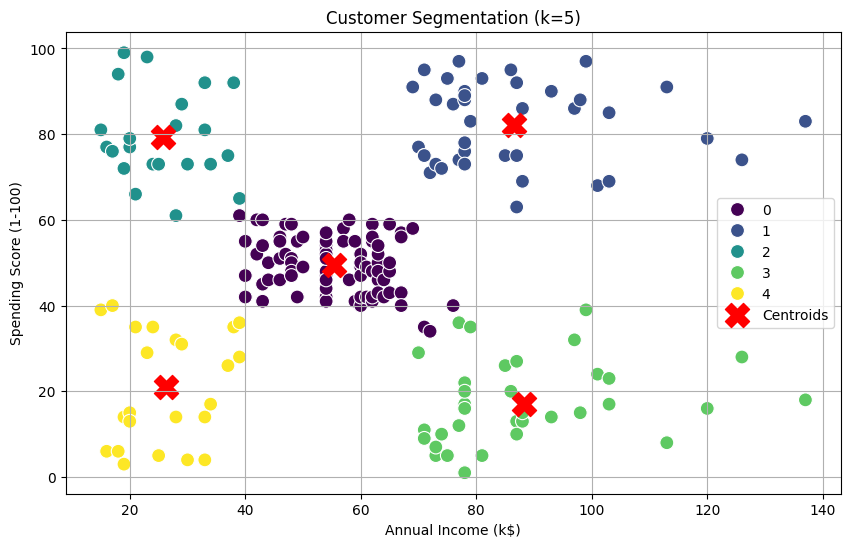

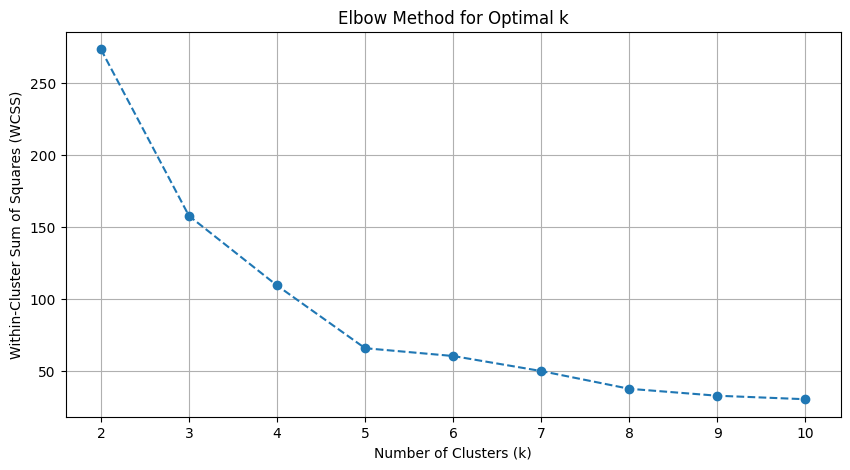

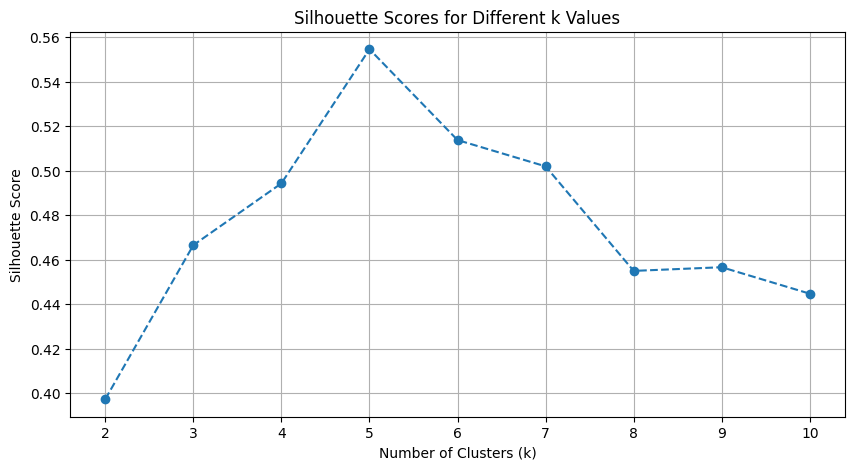

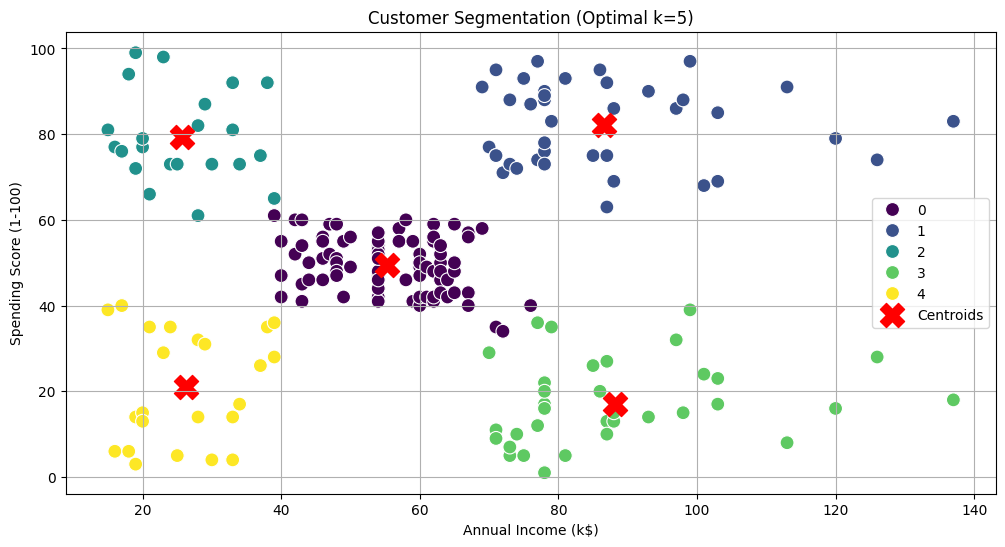


Cluster Statistics:
                 Cluster  Avg_Income  Avg_Spending_Score  Count
Optimal_Cluster                                                
0                      0   55.296296           49.518519     81
1                      1   86.538462           82.128205     39
2                      2   25.727273           79.363636     22
3                      3   88.200000           17.114286     35
4                      4   26.304348           20.913043     23


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Q1: Load and preprocess the data
# Load the dataset (update path as needed)
df = pd.read_csv('/content/Mall_Customers.csv')

# Display dataset info
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Q2: Perform K-Means Clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='viridis', s=100)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0],
            scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],
            s=300, c='red', marker='X', label='Centroids')
plt.title('Customer Segmentation (k=5)')
plt.legend()
plt.grid(True)
plt.show()

# Q3: Determine optimal k using Elbow Method
wcss = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot WCSS (Elbow Method)
plt.figure(figsize=(10, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k Values')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Q4: Final clustering with optimal k
# Based on the plots, choose optimal k (typically where elbow occurs)
optimal_k = 5  # Change this based on your elbow plot

final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_kmeans.fit(X_scaled)
df['Optimal_Cluster'] = final_kmeans.labels_

# Visualize final clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Optimal_Cluster', palette='viridis', s=100)
plt.scatter(scaler.inverse_transform(final_kmeans.cluster_centers_)[:, 0],
            scaler.inverse_transform(final_kmeans.cluster_centers_)[:, 1],
            s=300, c='red', marker='X', label='Centroids')
plt.title(f'Customer Segmentation (Optimal k={optimal_k})')
plt.legend()
plt.grid(True)
plt.show()

# Cluster analysis
cluster_centers = scaler.inverse_transform(final_kmeans.cluster_centers_)
cluster_stats = pd.DataFrame({
    'Cluster': range(optimal_k),
    'Avg_Income': cluster_centers[:, 0],
    'Avg_Spending_Score': cluster_centers[:, 1],
    'Count': df['Optimal_Cluster'].value_counts().sort_index()
})

print("\nCluster Statistics:")
print(cluster_stats)


In [2]:
# Interpretation of clusters
print("\nCluster Interpretation:")
print("1. High Income, Low Spending - Should be targeted with premium products")
print("2. Moderate Income, Moderate Spending - General marketing strategies")
print("3. High Income, High Spending - VIP customers, reward programs")
print("4. Low Income, High Spending - Budget-conscious but frequent buyers")
print("5. Low Income, Low Spending - Need incentives to increase spending")


Cluster Interpretation:
1. High Income, Low Spending - Should be targeted with premium products
2. Moderate Income, Moderate Spending - General marketing strategies
3. High Income, High Spending - VIP customers, reward programs
4. Low Income, High Spending - Budget-conscious but frequent buyers
5. Low Income, Low Spending - Need incentives to increase spending
